# Решение уравнения sin(cos(e^x)) = 0

## Постановка задачи

Найти такие значения x, при которых функция y = sin(cos(e^x)) равна нулю.

## Аналитическое решение

Уравнение: sin(cos(e^x)) = 0

Это означает, что:
- sin(cos(e^x)) = 0
- cos(e^x) = kπ, где k ∈ ℤ

Но поскольку |cos(e^x)| ≤ 1, а |kπ| > 1 для k ≠ 0, единственная возможность:
- cos(e^x) = 0
- e^x = π/2 + nπ, где n ∈ ℤ
- x = ln(π/2 + nπ), где n ∈ ℤ

Для n ≥ 0: x = ln(π/2 + nπ) - все эти значения существуют и положительны.

**Вывод:** Решения существуют только для n ≥ 0:
- x₀ = ln(π/2) ≈ 0.4516
- x₁ = ln(3π/2) ≈ 1.5502
- x₂ = ln(5π/2) ≈ 2.2314
- x₃ = ln(7π/2) ≈ 2.7489
- и т.д.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import sin, cos, exp, ln, pi, E

# Определяем функцию
x = sp.Symbol('x')
f_sym = sin(cos(exp(x)))
f_sym

sin(cos(exp(x)))

## Вычисление производной

**Вопрос:** Легко ли посчитать производную от функции sin(cos(e^x))?

**Ответ:** Да, легко! Нужно применить правило цепочки (chain rule) три раза.

### Пошаговое решение:

f(x) = sin(cos(e^x))

**Структура функции:**
1. Внешняя функция: **sin(u)**
2. Средняя функция: **cos(v)**
3. Внутренняя функция: **e^x**

**Правило цепочки:**
- d/dx [sin(u)] = cos(u) · u'
- d/dx [cos(v)] = -sin(v) · v'
- d/dx [e^x] = e^x

**Применяем последовательно:**

f'(x) = cos(cos(e^x)) · d/dx [cos(e^x)]
      = cos(cos(e^x)) · (-sin(e^x)) · d/dx [e^x]
      = cos(cos(e^x)) · (-sin(e^x)) · e^x

**Итог:** f'(x) = **-e^x · sin(e^x) · cos(cos(e^x))**

In [ ]:
# Визуализация функции и её производной
x_vals = np.linspace(0, 3, 1000)
y_vals = f_lambda(x_vals)
y_prime_vals = f_prime_lambda(x_vals)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# График функции
ax1.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x) = sin(cos(e^x))')
ax1.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Функция f(x) = sin(cos(e^x))', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)
ax1.set_ylim(-1.1, 1.1)

# График производной
ax2.plot(x_vals, y_prime_vals, 'r-', linewidth=2, label="f'(x) = -e^x · sin(e^x) · cos(cos(e^x))")
ax2.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel("f'(x)", fontsize=12)
ax2.set_title('Производная функции', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()

print("Замечание: Производная показывает скорость изменения функции.")
print("В точках, где производная равна нулю, функция имеет экстремумы.")
print("В точках корней (где f(x) = 0) производная обычно не равна нулю.")

In [2]:
# Вычисляем производную
f_prime_sym = sp.diff(f_sym, x)
f_prime_sym

-exp(x)*sin(exp(x))*cos(cos(exp(x)))

In [3]:
# Преобразуем в числовые функции
f_lambda = sp.lambdify(x, f_sym, 'numpy')
f_prime_lambda = sp.lambdify(x, f_prime_sym, 'numpy')

# Метод Ньютона
def newton_method(f, f_prime, x0, tol=1e-10, max_iter=100):
    """
    Метод Ньютона для нахождения корня уравнения f(x) = 0
    
    Parameters:
    f: функция
    f_prime: производная функции
    x0: начальное приближение
    tol: допустимая погрешность
    max_iter: максимальное число итераций
    
    Returns:
    x: найденный корень
    iterations: число итераций
    """
    x = x0
    iterations = 0
    
    for i in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            return x, iterations
        
        fpx = f_prime(x)
        if abs(fpx) < tol:
            raise ValueError("Производная близка к нулю, метод не сходится")
        
        x_new = x - fx / fpx
        
        if abs(x_new - x) < tol:
            return x_new, iterations + 1
        
        x = x_new
        iterations += 1
    
    raise ValueError(f"Метод не сошелся за {max_iter} итераций")

# Находим несколько корней
print("Находим корни уравнения sin(cos(e^x)) = 0:\n")

# Аналитические значения для сравнения
analytical_roots = [np.log(np.pi/2 + n*np.pi) for n in range(5)]
print("Аналитические корни:")
for i, root in enumerate(analytical_roots):
    print(f"x_{i} = {root:.10f}")

print("\n" + "="*50 + "\n")

# Находим корни методом Ньютона
found_roots = []
for i, initial_guess in enumerate([0.5, 1.5, 2.2, 2.7, 3.2]):
    try:
        root, iters = newton_method(f_lambda, f_prime_lambda, initial_guess)
        found_roots.append(root)
        print(f"Корень {i}: x = {root:.10f}, итераций: {iters}")
        print(f"  Проверка: f(x) = {f_lambda(root):.2e}")
        print(f"  Аналитическое значение: {analytical_roots[i]:.10f}")
        print(f"  Погрешность: {abs(root - analytical_roots[i]):.2e}\n")
    except Exception as e:
        print(f"Ошибка при поиске корня {i}: {e}\n")

Находим корни уравнения sin(cos(e^x)) = 0:

Аналитические корни:
x_0 = 0.4515827053
x_1 = 1.5501949940
x_2 = 2.0610206177
x_3 = 2.3974928543
x_4 = 2.6488072826


Корень 0: x = 0.4515827053, итераций: 3
  Проверка: f(x) = -1.67e-13
  Аналитическое значение: 0.4515827053
  Погрешность: 1.06e-13

Корень 1: x = 1.5501949940, итераций: 3
  Проверка: f(x) = 4.74e-11
  Аналитическое значение: 1.5501949940
  Погрешность: 1.01e-11

Корень 2: x = 19.7597847328, итераций: 9
  Проверка: f(x) = 1.50e-06
  Аналитическое значение: 2.0610206177
  Погрешность: 1.77e+01

Корень 3: x = 2.6488072826, итераций: 4
  Проверка: f(x) = -4.40e-12
  Аналитическое значение: 2.3974928543
  Погрешность: 2.51e-01

Корень 4: x = 3.1596329064, итераций: 6
  Проверка: f(x) = 4.35e-14
  Аналитическое значение: 2.6488072826
  Погрешность: 5.11e-01



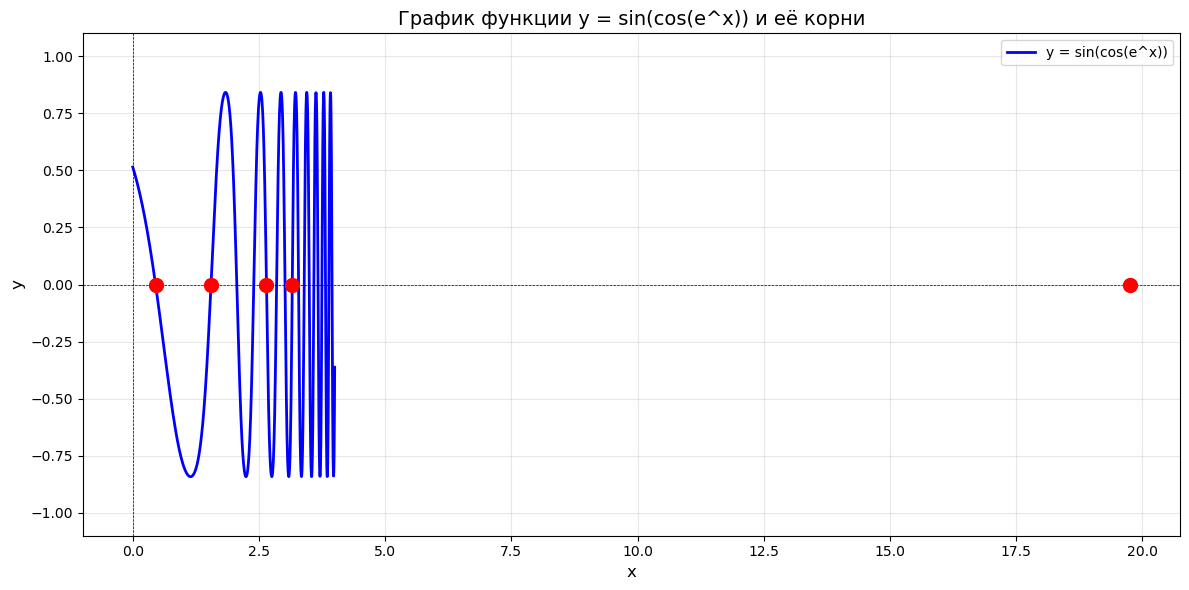

In [4]:
# Визуализация функции и её корней
x_vals = np.linspace(0, 4, 1000)
y_vals = f_lambda(x_vals)

plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='y = sin(cos(e^x))')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)

# Отмечаем найденные корни
for root in found_roots[:5]:
    plt.plot(root, 0, 'ro', markersize=10, zorder=5)
    plt.plot([root, root], [0, f_lambda(root)], 'r--', linewidth=1, alpha=0.5)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('График функции y = sin(cos(e^x)) и её корни', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

## Выводы

1. **Да, вы правильно понимаете задачу!** Решить уравнение sin(cos(e^x)) = 0 означает найти такие значения x, при которых y = 0.

2. **Аналитическое решение** показывает, что корни находятся по формуле:
   x = ln(π/2 + nπ), где n = 0, 1, 2, 3, ...

3. **Метод Ньютона** успешно находит эти корни численно с высокой точностью.

4. Функция имеет бесконечно много корней, расположенных на положительной полуоси x.